# Capstone Project — The Battle of Neighbourhoods

### Introduction
<p>New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.</p>
 <p>New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.</p> 
    <p>The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies.
    Over last decades it is continuously grow because of the city’s important role in government and commercial business.
    
</p>
With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc.

So as part of this project , we will list and visualise all major parts of New Delhi City .
   </p>

 ### Questions that can be asked using the above mentioned datasets
- What is best location in New Delhi City for Chinese Cuisine ? 
- Which areas have large number of Chinese Resturant Market ? 
- Which all areas have less number of resturant ?
- Which is the best place to stay if I prefer Chinese Cuisine ?
- What places are have best restaurant in New Delhi?

### Data
For this project we need the following data :
<ul>
<li> New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
    <ul>
        <li>Data source : <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
 <li> Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
     </ul>
<li> Nearby places in each locality of new delhi city.
        <ul>
            <li>Data source : <a href="https://developer.foursquare.com/"> Fousquare API </a>
        <li> Description : By using this api we will get all the venues in each neighborhood. 
    

### Approach
- Collect the new delhi city data from <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using aggregative rating for each resturant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python)

In [19]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


## Read the zomato resturant data from csv file

In [20]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [21]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

## Data Cleaning
#### remove the unwanted columns and rows from dataset

In [22]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [23]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [24]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

### created map to show the restaurant cluters 

In [25]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [26]:
df_Res.head()


Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        1  
2        1  
3        1  
4        1  
5        1

## What places are have best restaurant in New Delhi?

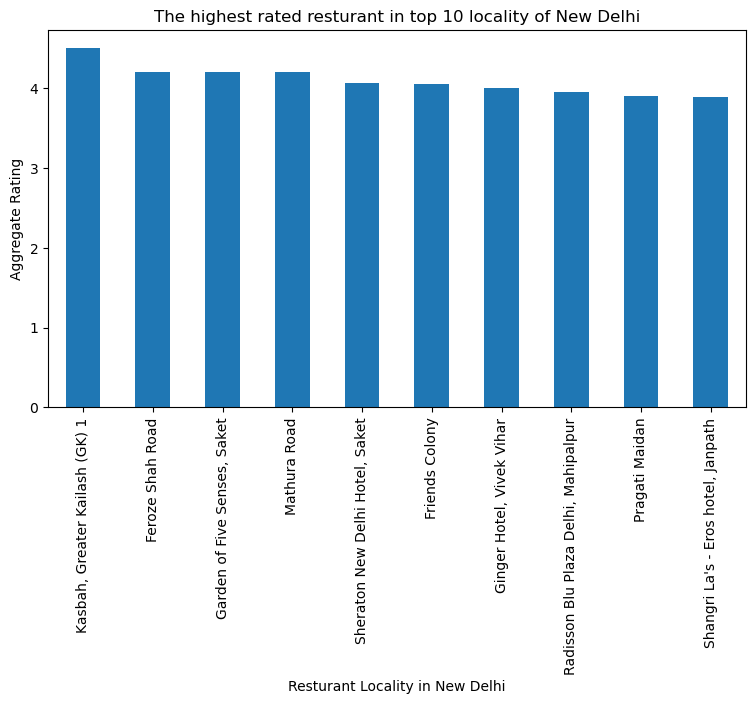

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()


The best restarants are available in <b>Kesbah, Greater Kailash area.</b>

## what places are have worst restaurants in New Delhi?

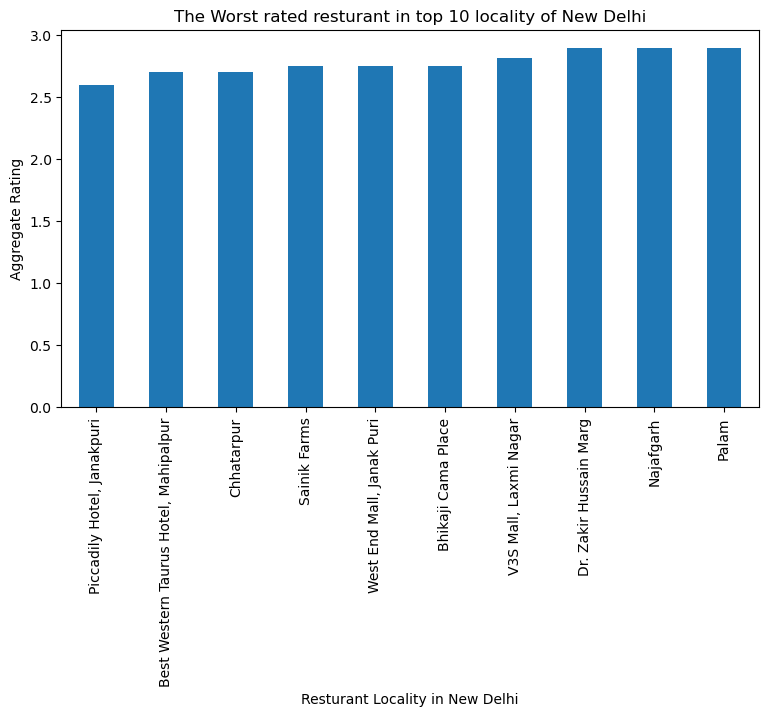

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restarants are available in <b>Piccadily Hotel, Janakpuri.</b>

## Which place are suitable for edible person in New Delhi city?

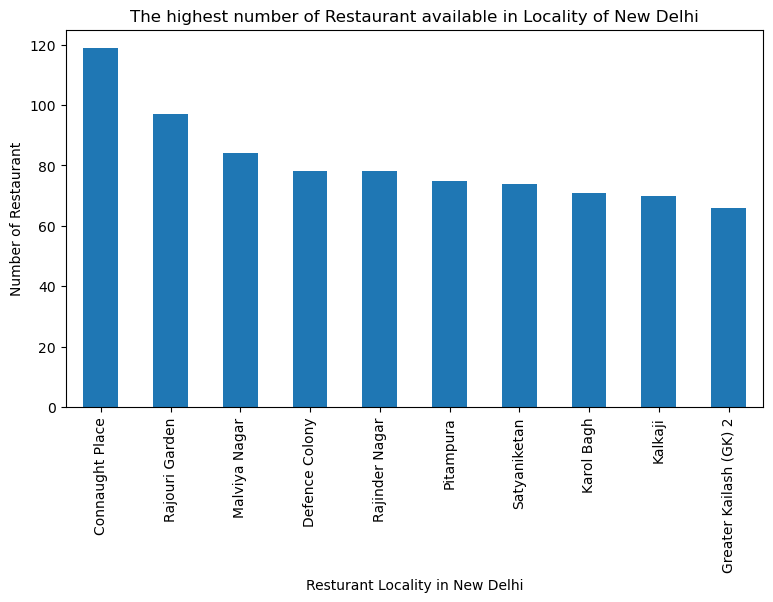

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

<b>Connaught Place</b> is the best places for edible person to stay there.

## Which place are not suitable for edible person in New Delhi city?

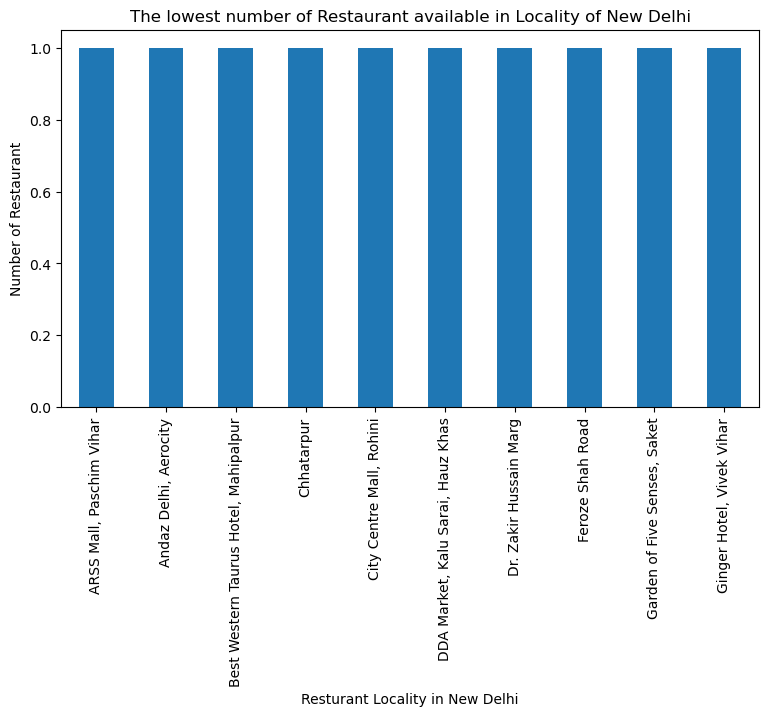

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## What are the best places for chinese restaurant in New Delhi city

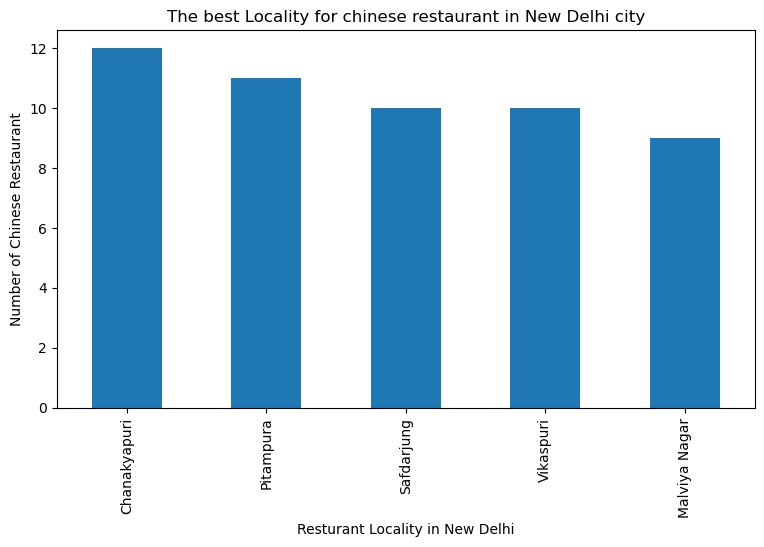

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

<b>Chanakyapuri</b> is the best place for Chinese restaurant.

## which places are the best chinese resturants in New Delhi?  

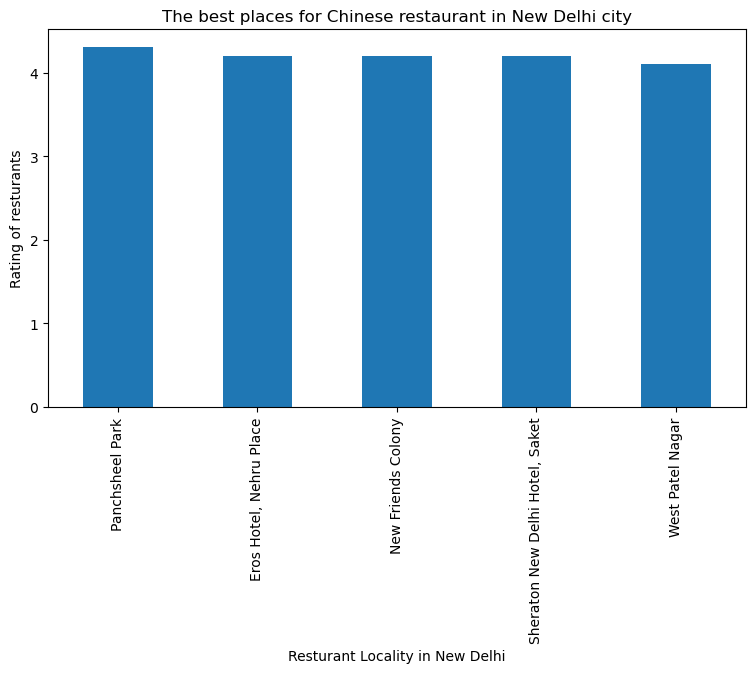

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

<b> Panchsheel park</b> is best Chinese resturants.

### Data transformation
Based on Locality grouping the data

In [33]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [34]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [35]:
df_final.shape

(240, 8)

## Define Foursquare Credentials and Version

In [36]:

## Define Foursquare Credentials and Version
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


## create a function to repeat the same process to all the Locality in New Delhi

In [37]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## find the venues in all New Delhi Locality

In [38]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [39]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [40]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         7                   7      7   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   4                   4      4   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 15                  15     15   
West Patel Nagar                                4                   4      4   
Worldmark 1, Aerocity                          30                  30     30   
Yusuf Sarai                                    13                  13     13   
ibis New Delhi, Aerocity                       28                  28     28   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      7                7   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                4                4   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              15               15   
West Patel Nagar                             4                4   
Worldmark 1, Aerocity                       30               30   
Yusuf Sarai                                 13               13   
ibis New Delhi, Aerocity                    28               28   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      7  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                4  
...                                        ...  
West Gate Mall, Rajouri Garden              15  
West Patel Nagar                             4  
Worldmark 1, Aerocity                       30  
Yusuf Sarai                                 13  
ibis New Delhi, Aerocity                    28  

[238 rows x 6 columns]

In [41]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 209 uniques categories.


In [42]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                   0        0                   0               0   
1                   0        0                   0               0   
2                   0        0                   0               0   
3                   0        0                   0               0   
4                   0        0                   0               0   

   Airport Service  Airport Terminal  ...  Trail  Train Station  \
0                0                 0  ...      0              0   
1                0                 0  ...      0              0   
2                0                 0  ...      0              0   
3                0                 0  ...      0              0   
4                0                 0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 210 columns]

In [43]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111           0.000000   
1                           Adchini  0.000000           0.000000   
2     Aditya Mega Mall, Karkardooma  0.000000           0.000000   
3                          Aerocity  0.000000           0.000000   
4     Aggarwal City Mall, Pitampura  0.000000           0.000000   
..                              ...       ...                ...   
233  West Gate Mall, Rajouri Garden  0.000000           0.000000   
234                West Patel Nagar  0.000000           0.000000   
235           Worldmark 1, Aerocity  0.000000           0.033333   
236                     Yusuf Sarai  0.000000           0.000000   
237        ibis New Delhi, Aerocity  0.000000           0.000000   

     Afghan Restaurant  African Restaurant  Airport  Airport Food Court  \
0                  0.0                 0.0      0.0                 0.0   
1                  0.0                 0.0      0.0                 0.0   
2                  0.0                 0.0      0.0                 0.0   
3                  0.0                 0.0      0.0                 0.0   
4                  0.0                 0.0      0.0                 0.0   
..                 ...                 ...      ...                 ...   
233                0.0                 0.0      0.0                 0.0   
234                0.0                 0.0      0.0                 0.0   
235                0.0                 0.0      0.0                 0.0   
236                0.0                 0.0      0.0                 0.0   
237                0.0                 0.0      0.0                 0.0   

     Airport Lounge  Airport Service  Airport Terminal  ...  Trail  \
0          0.000000              0.0          0.000000  ...    0.0   
1          0.000000              0.0          0.000000  ...    0.0   
2          0.000000              0.0          0.000000  ...    0.0   
3          0.142857              0.0          0.142857  ...    0.0   
4          0.000000              0.0          0.000000  ...    0.0   
..              ...              ...               ...  ...    ...   
233        0.000000              0.0          0.000000  ...    0.0   
234        0.000000              0.0          0.000000  ...    0.0   
235        0.000000              0.0          0.000000  ...    0.0   
236        0.000000              0.0          0.000000  ...    0.0   
237        0.000000              0.0          0.000000  ...    0.0   

     Train Station  Turkish Restaurant  Udupi Restaurant  \
0         0.000000                 0.0               0.0   
1         0.000000                 0.0               0.0   
2         0.000000                 0.0               0.0   
3         0.000000                 0.0               0.0   
4         0.000000                 0.0               0.0   
..             ...                 ...               ...   
233       0.000000                 0.0               0.0   
234       0.000000                 0.0               0.0   
235       0.033333                 0.0               0.0   
236       0.000000                 0.0               0.0   
237       0.035714                 0.0               0.0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0.0                    0.0         0.0   
1                              0.0                    0.0         0.0   
2                              0.0                    0.0         0.0   
3                              0.0                    0.0         0.0   
4                              0.0                    0.0         0.0   
..                             ...                    ...         ...   
233                            0.0                    0.0         0.0   
234                            0.0                    0.0         0.0   
235                            0.0                    0.0         0.0   
236              

In [44]:
New_Delhi_grouped.shape

(238, 210)

In [45]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2              Market  0.11
3         Coffee Shop  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0  Indian Restaurant  0.29
1               Café  0.29
2   Parsi Restaurant  0.14
3                Pub  0.14
4              Hotel  0.14


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1          Multiplex   0.2
2      Shopping Mall   0.2
3  Indian Restaurant   0.2
4               Café   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1        Airport Lounge  0.14
2           Coffee Shop  0.14
3   Rental Car Location  0.14
4  Fast Food Restaurant  0.14


----Aggarwal City Mall, Pitampura----
               venue  freq
0        Pizza Place  0.25
1  Indian Restaurant  0.25
2         Donut Shop  0.25
3   Department Store  0.25
4        Karaoke Bar  0.00


----Aggarwal C

In [46]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [47]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini     Indian Restaurant   
2     Aditya Mega Mall, Karkardooma     Indian Restaurant   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura      Department Store   
..                              ...                   ...   
233  West Gate Mall, Rajouri Garden  Fast Food Restaurant   
234                West Patel Nagar              Pharmacy   
235           Worldmark 1, Aerocity                 Hotel   
236                     Yusuf Sarai     Indian Restaurant   
237        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue  \
0                     ATM           Coffee Shop   
1                    Café      Parsi Restaurant   
2             Pizza Place         Shopping Mall   
3    Fast Food Restaurant      Airport Terminal   
4       Indian Restaurant           Pizza Place   
..                    ...                   ...   
233                  Café        Cosmetics Shop   
234           Pizza Place  Fast Food Restaurant   
235           Coffee Shop       Bed & Breakfast   
236           Coffee Shop                 Hotel   
237           Coffee Shop                   Spa   

              4th Most Common Venue 5th Most Common Venue  \
0    Multicuisine Indian Restaurant        Sandwich Place   
1                             Hotel                   Pub   
2                         Multiplex                 Hotel   
3               Rental Car Location           Coffee Shop   
4                        Donut Shop  Fast Food Restaurant   
..                              ...                   ...   
233             American Restaurant     Indian Restaurant   
234               Indian Restaurant    African Restaurant   
235                             Spa      Asian Restaurant   
236                             Bar  Fast Food Restaurant   
237               Indian Restaurant      Asian Restaurant   

      6th Most Common Venue 7th Most Common Venue   8th Most Common Venue  \
0                    Market    Chinese Restaurant             Pizza Place   
1      Fast Food Restaurant    Frozen Yogurt Shop     Fried Chicken Joint   
2                      Café     Fish & Chips Shop     Fried Chicken Joint   
3            Airport Lounge           Flea Market                    Food   
4    Furniture / Home Store    Frozen Yogurt Shop     Fried Chicken Joint   
..                      ...                   ...                     ...   
233             Pizza Place             Multiplex             Snack Place   
234       Fish & Chips Shop           Gaming Cafe  Furniture / Home Store   
235          Breakfast Spot         Shopping Mall                   Diner   
236       Korean Restaurant      Asian Restaurant          Breakfast Spot   
237            Cocktail Bar    Punjabi Restaurant          Breakfast Spot   

    9th Most Common Venue 10th Most Common Venue  
0     Dumpling Restaurant            Flea Market  
1       French Restaurant             Food Truck  
2       French Restaurant             Food Truck  
3       Food & Drink Shop          Women's Store  
4       French Restaurant             Food Truck  
..                    ...                    ...  
233                Lounge                 Garden  
234    Frozen Yogurt Shop    Fried Chicken Joint  
235    Punjabi Restaurant           Cocktail Bar  
236                  Park    Japanese Restaurant  
237         Shopping Mall        Bed & Breakfast  

[238 rows x 11 columns]

In [48]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(238,)

In [50]:
# add clustering labels
New_Delhi_merged = df_final.head(238)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

<ipython-input-50-ad7efc21b71c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Delhi_merged['Cluster Labels'] = kmeans.labels_


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               3   
1  Average, Good, Poor, Very Good         1560               3   
2                   Average, Good          434               3   
3                         Average           59               1   
4                         Average          126               3   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM           Coffee Shop   
1     Indian Restaurant                  Café      Parsi Restaurant   
2     Indian Restaurant           Pizza Place         Shopping Mall   
3                 Hotel  Fast Food Restaurant      Airport Terminal   
4      Department Store     Indian Restaurant           Pizza Place   

            4th Most Common Venue 5th Most Common Venue  \
0  Multicuisine Indian Restaurant        Sandwich Place   
1                           Hotel                   Pub   
2                       Multiplex                 Hotel   
3             Rental Car Location           Coffee Shop   
4                      Donut Shop  Fast Food Restaurant   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                  Market    Chinese Restaurant           Pizza Place   
1    Fast Food Restaurant    Frozen Yogurt Shop   Fried Chicken Joint   
2                    Café     Fish & Chips Shop   Fried Chicken Joint   
3          Airport Lounge           Flea Market                  Food   
4  Furniture / Home Store    Frozen Yogurt Shop   Fried Chicken Joint   

  9th Most Common Venue 10th Most Common Venue  
0   Dumpling Restaurant            Flea Market  
1     French Restaurant             Food Truck  
2     French Restaurant             Food Truck  
3     Food & Drink Shop          Women's Store  
4     French Restaurant             Food Truck

In [51]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [52]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
8    28.555599    3.800000                         Average, Very Good   
9    28.659870    3.281481                              Average, Good   
16   28.630440    3.208333                        Average, Good, Poor   
17   28.557846    3.220000                        Average, Good, Poor   
20   28.568193    2.755556                              Average, Poor   
21   28.589797    3.085714                        Average, Good, Poor   
27   28.716874    3.400000                                    Average   
28   28.650254    3.166667                              Average, Good   
30   28.561898    3.100000                              Average, Good   
31   28.632091    3.779832        Average, Excellent, Good, Very Good   
45   28.696802    3.296296  Average, Excellent, Good, Poor, Very Good   
58   28.514237    4.200000                                  Very Good   
62   28.550319    3.701562        Average, Excellent, Good, Very Good   
63   28.535531    3.553030  Average, Excellent, Good, Poor, Very Good   
64   28.538014    3.475000                              Average, Good   
68   28.554275    3.845833        Average, Excellent, Good, Very Good   
75   28.569040    3.800000                            Good, Very Good   
78   28.597665    3.733333                   Average, Good, Very Good   
79   28.631930    3.300000                              Average, Good   
81   28.536611    3.380000                         Average, Excellent   
82   28.548371    3.137500                        Average, Good, Poor   
86   28.624632    3.315217  Average, Excellent, Good, Poor, Very Good   
89   28.539003    3.150000                        Average, Good, Poor   
91   28.556503    3.400000                              Average, Good   
93   28.554084    3.541667                   Average, Good, Very Good   
100  28.556869    4.500000                                  Excellent   
102  28.600492    3.802326        Average, Excellent, Good, Very Good   
108  28.563827    3.800000                            Good, Very Good   
109  28.689561    3.311111                         Average, Very Good   
121  28.702381    3.100000                                    Average   
123  28.626791    3.250000                                    Average   
127  28.619410    3.134615                        Average, Good, Poor   
135  28.579641    3.180000                              Average, Good   
143  28.564494    3.140625                   Average, Good, Very Good   
147  28.523307    3.430769             Average, Good, Poor, Very Good   
158  28.700027    3.157333                        Average, Good, Poor   
160  28.712975    3.066667                                    Average   
165  28.539464    2.900000                                    Average   
170  28.643757    3.575000                              Average, Good   
171  28.639604    3.056410             Average, Good, Poor, Very Good   
174  28.550802    3.250000                              Average, Good   
179  28.572117    3.871429                   Average, Good, Very Good   
181  28.571849    3.316667                              Average, Good   
189  28.620715    3.880000                   Average, Good, Very Good   
190  28.577107    3.100000                                    Average   
200  28.564288    3.200000                                    Average   
202  28.646593    3.280952                   Average, Good, Very Good   
207  28.625445    3.600000                   Average, Good, Very Good   
213  28.623619    3.466667                              Average, Good   
215  28.605069    3.785714                   Average, Good, Very Good   
220  28.523519    3.700000                                       Good   
225  28.524070    3.686364                   Average, Good, Very Good   
226  28.525054    3.322222                              Average, Good   
228  28.596073    3.052941                              Average, Good

In [53]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
12   28.641698    3.050000                              Average           17   
19   28.548827    2.700000                              Average            9   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
83   28.552895    3.300000                              Average           15   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
128  28.608252    2.945000                        Average, Good          406   
149  28.642910    2.996552       Average, Good, Poor, Very Good         2850   
161  28.639872    3.134483                  Average, Good, Poor         1481   
162  28.725814    3.050000                              Average           50   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
196  28.680905    3.320000                        Average, Good          286   
204  28.597038    3.533333             Average, Good, Very Good          902   
216  28.594859    3.800000                      Good, Very Good          287   
235  28.652978    3.500000                                 Good          178   
237  28.550257    3.220000                        Average, Good           77   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 1                 Hotel  Fast Food Restaurant   
10                1                 Hotel                   Spa   
12                1                 Hotel     Indian Restaurant   
19                1                 Hotel       Bed & Breakfast   
35                1                 Hotel     Indian Restaurant   
56                1                 Hotel      Sculpture Garden   
60                1                 Hotel      Asian Restaurant   
69                1                 Hotel           Coffee Shop   
70                1                 Hotel            Restaurant   
83                1                 Hotel           Coffee Shop   
112               1                 Hotel           Coffee Shop   
119               1                 Hotel     Indian Restaurant   
128               1                 Hotel         Women's Store   
149               1                 Hotel     Indian Restaurant   
161               1  Fast Food Restaurant        Ice Cream Shop   
162               1                 Hotel                  Café   
168               1     Indian Restaurant             Hotel Bar   
173               1     Indian Restaurant         Shopping Mall   
196               1  Fast Food Restaurant        Breakfast Spot   
204               1     Indian Restaurant             Nightclub   
216               1     Indian Restaurant                 Hotel   
235               1  Fast Food Restaurant                  Café   
237               1                 Hotel           Coffee Shop   

    3rd Most Common Venue   4th Most Common Venue      5th Most Common Venue  \
3        Airport Terminal     Rental Car Location                Coffee Shop   
10            Coffee Shop       Indian Restaurant               Cocktail Bar   
12                 Hostel           Movie Theater           Asian Restaurant   
19      Accessories Store      Italian Restaurant          Indian Restaurant   
35             Restaurant            Liquor Store                     Arcade   
5

In [54]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                  Comments  No_of_Votes  \
5    28.700516    3.040000       Average, Good, Poor          594   
22   28.654105    3.085714                   Average           80   
57   28.699837    3.376471  Average, Good, Very Good         2460   
101  28.667644    3.300000                   Average          132   
104  28.656263    3.097619             Average, Good          965   
130  28.724100    3.133333                   Average          325   
169  28.667261    3.200000                   Average           76   
180  28.534499    3.000000       Average, Good, Poor          173   
218  28.552403    3.833333           Good, Very Good         1133   
230  28.658041    3.400000                   Average           19   
234  28.630044    2.750000             Average, Poor          238   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
5                 2  Fast Food Restaurant           Pizza Place   
22                2  Fast Food Restaurant           Pizza Place   
57                2           Pizza Place            Food Truck   
101               2         Historic Site  Fast Food Restaurant   
104               2           Pizza Place                  Park   
130               2  Fast Food Restaurant         Shopping Mall   
169               2                 Hotel  Fast Food Restaurant   
180               2                  Café         Deli / Bodega   
218               2     Indian Restaurant                   Bar   
230               2                  Park          Burger Joint   
234               2  Fast Food Restaurant        Sandwich Place   

    3rd Most Common Venue   4th Most Common Venue   5th Most Common Venue  \
5           Shopping Mall               Multiplex          Sandwich Place   
22          Women's Store  Furniture / Home Store      Frozen Yogurt Shop   
57          Women's Store    Fast Food Restaurant  Furniture / Home Store   
101           Pizza Place             Bus Station     American Restaurant   
104  Fast Food Restaurant           Women's Store      Falafel Restaurant   
130           Pizza Place              Theme Park        Asian Restaurant   
169     Indian Restaurant              Food Truck             Coffee Shop   
180         Grocery Store                  Garden  Furniture / Home Store   
218           Comedy Club                    Café                 Stadium   
230         Burrito Place             Bus Station                    Café   
234     Indian Restaurant    Gym / Fitness Center              Restaurant   

    6th Most Common Venue   7th Most Common Venue 8th Most Common Venue  \
5    Gym / Fitness Center           Women's Store     French Restaurant   
22    Fried Chicken Joint       French Restaurant            Food Truck   
57     Frozen Yogurt Shop     Fried Chicken Joint     French Restaurant   
101         Metro Station      Frozen Yogurt Shop   Fried Chicken Joint   
104    Frozen Yogurt Shop     Fried Chicken Joint     French Restaurant   
130         Women's Store      Frozen Yogurt Shop   Fried Chicken Joint   
169         Women's Store  Furniture / Home Store    Frozen Yogurt Shop   
180    Frozen Yogurt Shop     Fried Chicken Joint     French Restaurant   
218    Chinese Restaurant   Australian Restaurant           Coffee Shop   
230           Art Gallery             Snack Place         Women's Store   
234           Coffee Shop      Light Rail Station             BBQ Joint   

    9th Most Common Venue  10th Most Common Venue  
5              Food Truck              Food Court  
22             Food Court       Food & Drink Shop  
57             Food Court       Food & Drink Shop  
101     French Restaurant              Food Truck  
104            Food Truck              Food Court  
130     French Restaurant              Food Truck  
169   Fried Chicken Joint       French Restaurant  
180            Food Truck              Food Court  
218               Theater  Furniture / Home Store  
230     Food & Drink Shop  Furn

In [55]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
0    28.668945    3.100000                         Average          117   
1    28.537063    3.292308  Average, Good, Poor, Very Good         1560   
2    28.656131    3.275000                   Average, Good          434   
4    28.690020    3.033333                         Average          126   
23   28.656414    3.358182        Average, Good, Very Good         6668   
..         ...         ...                             ...          ...   
211  28.579556    3.780000                            Good          709   
214  28.561105    3.425000                   Average, Good          246   
217  28.535183    3.066667                         Average           37   
221  28.560593    3.733333        Average, Good, Very Good          615   
222  28.628988    3.260000             Average, Good, Poor          239   

     Cluster Labels 1st Most Common Venue        2nd Most Common Venue  \
0                 3     Indian Restaurant                          ATM   
1                 3     Indian Restaurant                         Café   
2                 3     Indian Restaurant                  Pizza Place   
4                 3      Department Store            Indian Restaurant   
23                3     Indian Restaurant                  Snack Place   
..              ...                   ...                          ...   
211               3     Indian Restaurant  Northeast Indian Restaurant   
214               3                  Café                     Pharmacy   
217               3                 Hotel            Indian Restaurant   
221               3                Market                  Pizza Place   
222               3     Indian Restaurant                  Coffee Shop   

    3rd Most Common Venue           4th Most Common Venue  \
0             Coffee Shop  Multicuisine Indian Restaurant   
1        Parsi Restaurant                           Hotel   
2           Shopping Mall                       Multiplex   
4             Pizza Place                      Donut Shop   
23           Dessert Shop                          Market   
..                    ...                             ...   
211    Seafood Restaurant               French Restaurant   
214    Chinese Restaurant                          Lounge   
217         Women's Store            Fast Food Restaurant   
221                  Park                   Metro Station   
222        Sandwich Place                   Metro Station   

             5th Most Common Venue   6th Most Common Venue  \
0                   Sandwich Place                  Market   
1                              Pub    Fast Food Restaurant   
2                            Hotel                    Café   
4             Fast Food Restaurant  Furniture / Home Store   
23   Paper / Office Supplies Store           Train Station   
..                             ...                     ...   
211                            Spa    Gym / Fitness Center   
214      Middle Eastern Restaurant           Grocery Store   
217         Furniture / Home Store      Frozen Yogurt Shop   
221                           Café    Fast Food Restaurant   
222           Fast Food Restaurant      Chinese Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0      Chinese Restaurant           Pizza Place   Dumpling Restaurant   
1      Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
2       Fish & Chips Shop   Fried Chicken Joint     French Restaurant   
4      Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
23     Light Rail Station            Restaurant           IT Services   
..                    ...                   ...                   ...   
211          Cocktail Bar                  Pool        Breakfast Spot   
214           Coffee Shop                 Plaza       Thai Restaurant   
217   Fried Chicken Joint     French Restaurant            Food Truck   
221          

In [56]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                  Comments  No_of_Votes  \
6    28.527088    3.117391       Average, Good, Poor         1012   
7    28.541298    3.425000  Average, Good, Very Good         2460   
11   28.562580    3.750000  Average, Good, Very Good          875   
13   28.690182    3.090000       Average, Good, Poor          971   
14   28.693969    3.378571             Average, Good         2343   
..         ...         ...                       ...          ...   
224  28.636921    2.819231       Average, Good, Poor         2265   
227  28.559704    3.278261  Average, Good, Very Good         1043   
231  28.637492    3.062264       Average, Good, Poor         1253   
232  28.667344    3.077273       Average, Good, Poor          939   
236  28.648177    3.675000  Average, Good, Very Good          876   

     Cluster Labels    1st Most Common Venue 2nd Most Common Venue  \
6                 4  New American Restaurant                Market   
7                 4              Coffee Shop  Fast Food Restaurant   
11                4         Department Store           Karaoke Bar   
13                4             Dessert Shop            Smoke Shop   
14                4        Indian Restaurant      Asian Restaurant   
..              ...                      ...                   ...   
224               4     Fast Food Restaurant     Indian Restaurant   
227               4                     Café           Coffee Shop   
231               4        Indian Restaurant           Pizza Place   
232               4                Juice Bar    Athletics & Sports   
236               4                 Pharmacy           Pizza Place   

       3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
6                 Steakhouse           Coffee Shop  Furniture / Home Store   
7              Shopping Mall    Italian Restaurant          Clothing Store   
11      Fast Food Restaurant           Snack Place   Performing Arts Venue   
13                 BBQ Joint                Market             Snack Place   
14   South Indian Restaurant           Pizza Place             Coffee Shop   
..                       ...                   ...                     ...   
224             Liquor Store                Office             Pizza Place   
227               Restaurant    Chinese Restaurant    Fast Food Restaurant   
231           Ice Cream Shop  Fast Food Restaurant           Women's Store   
232                Gift Shop       Bed & Breakfast              Smoke Shop   
236     Fast Food Restaurant     Indian Restaurant      African Restaurant   

    6th Most Common Venue 7th Most Common Venue   8th Most Common Venue  \
6      Frozen Yogurt Shop   Fried Chicken Joint       French Restaurant   
7        Asian Restaurant                  Café       Indian Restaurant   
11                Dog Run            Donut Shop             Gaming Cafe   
13      Indian Restaurant           Pizza Place                   Diner   
14         Sandwich Place    Frozen Yogurt Shop     Fried Chicken Joint   
..                    ...                   ...                     ...   
224            Playground        Clothing Store       Food & Drink Shop   
227             Bookstore         Movie Theater       Food & Drink Shop   
231    Falafel Restaurant    Frozen Yogurt Shop     Fried Chicken Joint   
232         Women's Store           Gaming Cafe  Furniture / Home Store   
236     Fish & Chips Shop           Gaming Cafe  Furniture / Home Store   

         9th Most Common Venue  10th Most Common Venue  
6                   Food Truck              Food Court  
7           Chinese Restaurant               Bookstore  
11      Furniture / Home Store      Frozen Yogurt Shop  
13                 Gaming Cafe  Furniture / Home Store  
14           French Restaurant              Food Truck  
..                         ...                     ...  
224                       Café           Shopping Mall  
227  Middle Eastern Restaurant                 

### Conclusion 
- Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine. 
- Pancsheel park, Nehru place have the best Chinese Resturant. 
- Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
- Greater kailash, Feroze shah road, Saket have best resturants in New Delhi.
#### Cluster 1:
 It is most recommended for Indian Restaurants.
#### Cluster 2:
 It is most recommended for Hotels and nightclub.
#### Cluster 3 and Cluster 5:
 It is most recommended for Fast food.
#### Cluster 4:
 It is most recommended for the cafe and pizza.
    